# Perceptron Model with Iris Dataset


This notebook to train on how to build and train a Perceptron model using the Iris dataset. The Iris dataset is a classic dataset used in machine learning and statistics, consisting of 150 samples of iris flowers with four features each (sepal length, sepal width, petal length, and petal width) and three classes (Iris-setosa, Iris-versicolor, and Iris-virginica).

In this notebook, we will do the following:
* Load and prepare the Iris dataset.
* Split the dataset into training and testing sets.
* Standardize the features.
* Train a Perceptron model.
* Evaluate the model's performance.


# Import libraries

In [34]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import pandas as pd

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns

In [36]:
!pip install summarytools

In [37]:
!pip install skimpy

In [38]:
from skimpy import skim
from summarytools import dfSummary

In [44]:
df = pd.read_csv('/content/Iris.csv')
df.drop(columns=['Id'], inplace=True)

# EDA

In [45]:
X = df.drop(columns=['Species'])
y = df['Species']
y = y.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [46]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,SepalLengthCm[float64],Mean (sd) : 5.8 (0.8)min < med < max:4.3 < 5.8 < 7.9IQR (CV) : 1.3 (7.1),35 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtElEQVR4nO3dTYriQBiA4a/GVqJCggi68wIDs3DpIeawc4RZeAJv4E6QEDHTwZhkVg09je1PVTLWV/0++/wsXuRLUl1tmqYRwHffnn0DwD1enn0DXTHGDEVk4HCKU9M0r23dD9wEGaoxZjidTn/GcTyxPcfhcEiNMb+I1Q9BhioigziOJ6vV6jVJkuLRg7Msi9br9WS/3w9EhFA9EGqoIiKSJEkxm83+WB4+tL2u49jByHFB0KE+g+vYwchxGaG2z3rsYOT4HKF2xGHssB45QsZ7VKhAqFCBUKFCpzMqX4fQls5C5esQ2tTlLypfh9Cazl9PPevrEMLCwxRUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVGDhtGeqquqLSGyMsT1FkAt5CNUjeZ73y7L8sVgser1e7+H1ESLhLuQhVI+cTqeXKIpGy+WymM/n6aPHh7yQh1A9NB6PWcjzAaF+wmFWjOu67ndwS18aoV7gMiuWZRlVVfW9KIrfImL7q4gPCPUCl1lxu91ONpvN6Hw+97q6v6+IUK+wmRXTNA1yRnw2XvhDBa9/UXmgwRtvQ+WBBu95GyoPNHjP21Df8EADER6moAShQgVChQqEChUIFSoQKlQgVKhAqFCBUKHCzS9TDtubszAErbkaqsv25iwMQZtu/aJab2/OwhC06a5FKTbbm7MwBG3iYQoqECpUIFSo4P3CaTzGcZM1pw3WHP9T49VrE2pAXDdZc9lgzfU/Nd66NqEGxOXvzFrYYM36VeY91ybUANluslZVVSz2Y0Nc13U/SZLUcoO3q68zCRUi4j42dP0lklAhIu57s3b9JZJQ8Q/bsaHrL5G8R4UKhAoVCBUqECpUIFSoQKhQgVChAqFChbte+GdZFj164uPxGImI5Hke7Xa70f88Xuu1td636/H39PUXZ5y8xRUXT9kAAAAASUVORK5CYII="">",0(0.0%)
2,SepalWidthCm[float64],Mean (sd) : 3.1 (0.4)min < med < max:2.0 < 3.0 < 4.4IQR (CV) : 0.5 (7.0),23 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACw0lEQVR4nO3dvY7aQBRA4TuwIPMjWwgFOpqUkVJQ8hB52DxCCp6AIk0qOiRkgXAWYWxSpIrCAp4Z78415+tHuDjCGI+vzeVyESB0rY8+AOARLx99AKEyxvREpGu5/HS5XF59Hs+zI9QrjDG98Xj8LY7jkc36/X6fGmO+E6s/hHpdN47j0WKxeE2S5Fhl4W63i5bL5Wi73XZFhFA9IdQbkiQ5TiaT3xZLe94P5slxMQUVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFbgzVYOiKDoiEhtjbJazoeUKQvUsy7JOnudfZ7NZu91uV9onIMKGlrcQqmen0+kliqL+fD4/TqfTtMpaNrS8jVBrMhgM2NDiERdTUIFQoQKhQgVChQqEChUIFSoQKlQgVKjQ2D/8HQdIxGVZdnweD9w0MlTXARJ5nkdFUXw5Ho8/RMTm7hI8a2So4jBAQkRkvV6PVqtV/3w+t+s4OFQXdKgOp++4LMtOkiSpzf32NE253x6YYEN1OX1z6m6eYEMVh9M3p+7mCTlUEbGb/8Spu3n4HxUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChWC3ziNahwfEw92LDuhNojrY+Ihj2Un1Gaxfs4s9LHshBoYxzeqOD0mLgGPZSfUgLi+UaXJj4kTakBc3qgi0uzHxAk1QLZvVGnyY+K1hspEPfhSW6hM1INPdX6jMlEP3tT+G9VmJI9Is39voTru9UOFu9+orjNKLdYB/7kZKjNKEYp736jMKEUQHrqYYkbpc3DcZyDy95qntFx7c4shd6YgIu77DIqi6GRZ9nk4HP5qtVp51fX3thgSKkTE2z6DT/P5/GfV9Y9sMSRU/MN1n4HtermzxfChUHe7XVT1Uw+HQyQikmVZtNls+u+5Xutnaz1u1/WP9PUHQS+f8/4UpmMAAAAASUVORK5CYII="">",0(0.0%)
3,PetalLengthCm[float64],Mean (sd) : 3.8 (1.8)min < med < max:1.0 < 4.3 < 6.9IQR (CV) : 3.5 (2.1),43 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACp0lEQVR4nO3dTYriQBjG8afGD6JCRATdeYGBWbj0EHPYOcIsPIE3cCeIRMy0qNHZDQzT02pVYtdb/H/rrhjohyTvm6qKu91uAmL35bNPAHhE+94fOOd6krqexz/dbrc3z7HAHx8G1TnXG4/H3/M8H/kcfL/f75xzPwgrQt27onbzPB8tFou34XB4fObARVFky+VytN1uu5IIKoLcvfVL0nA4PE4mk18ex+95jAH+QTEFEwgqTCCoMIGgwgSCChMIKkwgqDCBoMIEggoTCCpMIKgw4aF3/XidwGmVUqJTKwlqREKnVUrpTq0kqHHxnlYppT21kqBGKGBapZTo1EqKKZjAFbUBAQVRfr1eO3WfTwoIas1CCqLz+ZxVVfX1eDz+lOR7608SQa2fd0G0Xq9Hq9Wqf7lcWk2dnFUEtSE+BdFut0uyEKoDxRRMIKgwgaDCBIIKEwgqTCCoMIGgwgSCChMIKkwgqDCBoMIE3vUnpqqqjqTcOeczPNr1VgQ1IWVZds7n87fZbNZqtVpPL2WJeb0VQU3I6XRqZ1nWn8/nx+l0untmbOzrrQhqggaDQXJb2VNMwQSCChMIKkwgqDCBoMKERqv+wOazFHEDGq/VWFBDm89S3A1ovFZjQQ1pPkvxN6DxWo03/AOaz1LEDegUxfyoxpspSIr/UY2gQlL8j2oEFX+J9VGNPipMIKgwgVv/f7AZb1wI6jvYjDc+BPV9bMYbGYL6ATbjjQfFFEzgioraNLlUm6CiFk0v1SaoqEXTS7UJKmrV1FLtZIMa+DlxmvaRSTKooZ8Tp2kfnySDqsDPidO0j0+qQZXk/zlxmvbxoeEPEx66ohZFkT174MPhkElSWZbZZrPpPzu+KIqsqqq2/BrI+fV6bfuctxR27p811vJvP/J/+g3LcowOEmBq9gAAAABJRU5ErkJggg=="">",0(0.0%)
4,PetalWidthCm[float64],Mean (sd) : 1.2 (0.8)min < med < max:0.1 < 1.3 < 2

In [47]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 150    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %   ┃ mean    ┃ sd        ┃ p0    ┃ p25   ┃ p50    ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ SepalLengthCm      │    0 │      0 │   5.843 │    0.8281 │   4.3 │   5.1 │    5.8 │  6.4 │   7.9 │ ▃▇▇▇▅▂  │  │
│ │ SepalWidthCm       │    0 │      0 │   3.054 │    0.4336 │     2 │   2.8 │      3 │  3.3 │   4.4 │ ▁▆▇▇▂▁  │  │
│ │ PetalLengthCm      │    0 │      0 │   3.759 │     1.764 │     1 │   1.6 │   4.35 │  5.1 │   6.9 │ ▇ ▂▇▆▂  │  │
│ │ PetalWidthCm       │    0 │      0 │   1.199 │    0.7632 │   0.1 │   0.3 │    1.3 │  1.8 │   2.5 │ ▇ ▂▆▅▃  │  │
│ └────────────────────┴──────┴────────┴─────────┴───────────┴───────┴───────┴────────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Species                   │       0 │          0 │                            1 │                      150 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# Split the dataset into training and testing sets

# Standardize the features

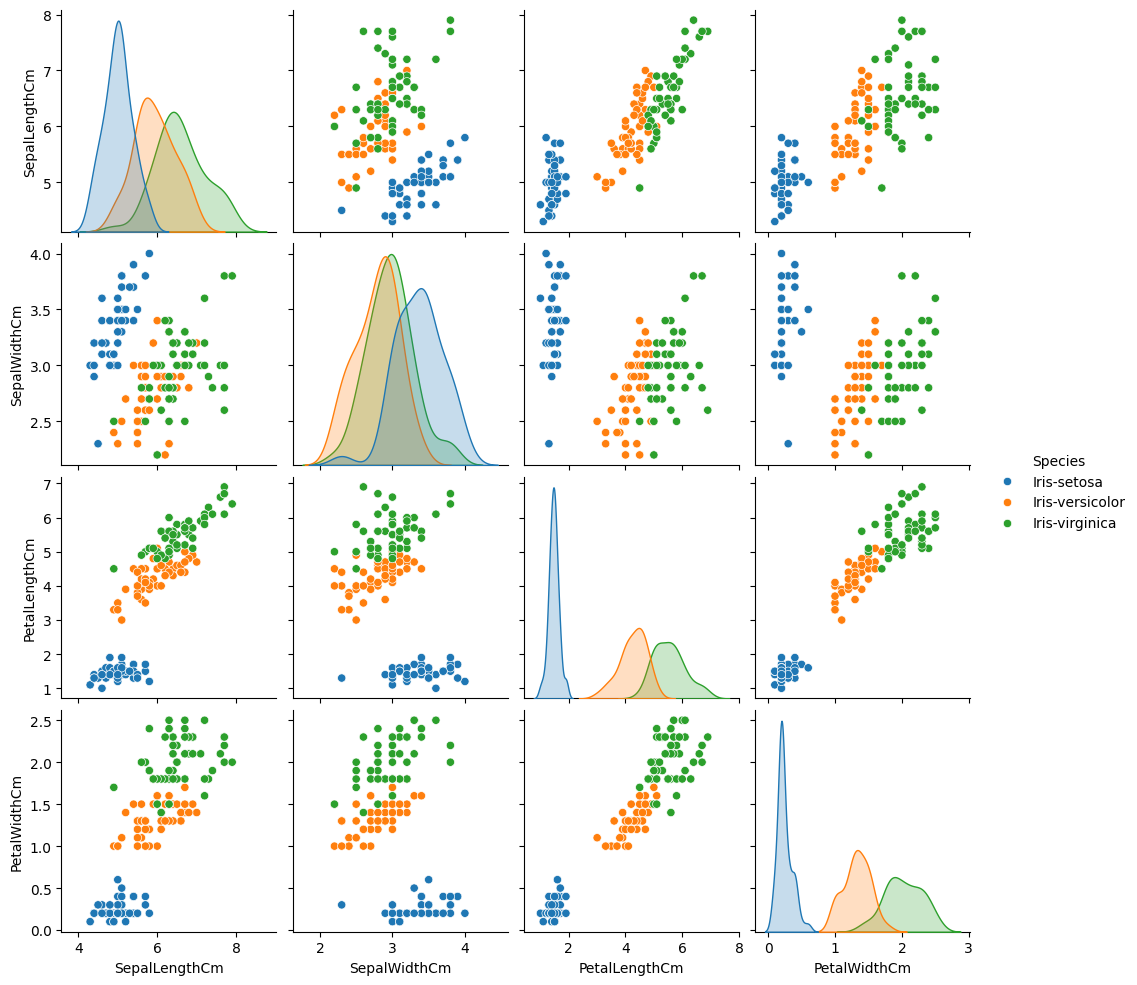

In [54]:
sns.pairplot(df, hue='Species')

<Axes: >

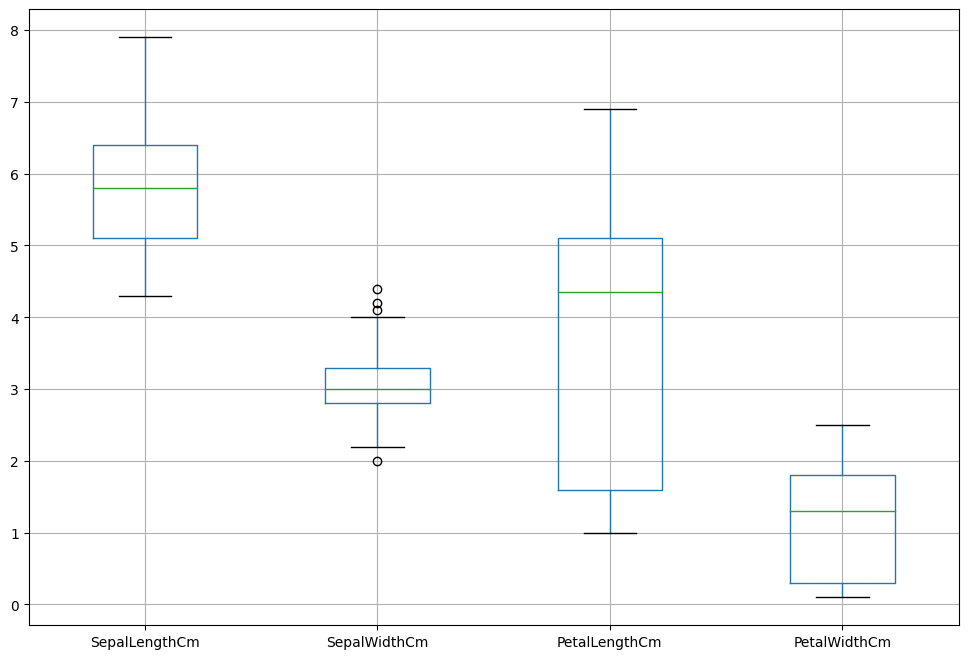

In [48]:
df.boxplot(figsize=(12,8))

In [52]:
def remove_outliers(df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df = df[(df >= lower_bound) & (df <= upper_bound)]
  return df

df['SepalLengthCm'] = remove_outliers(df['SepalLengthCm'])
df['SepalWidthCm'] = remove_outliers(df['SepalWidthCm'])
df['PetalLengthCm'] = remove_outliers(df['PetalLengthCm'])
df['PetalWidthCm'] = remove_outliers(df['PetalWidthCm'])

<Axes: >

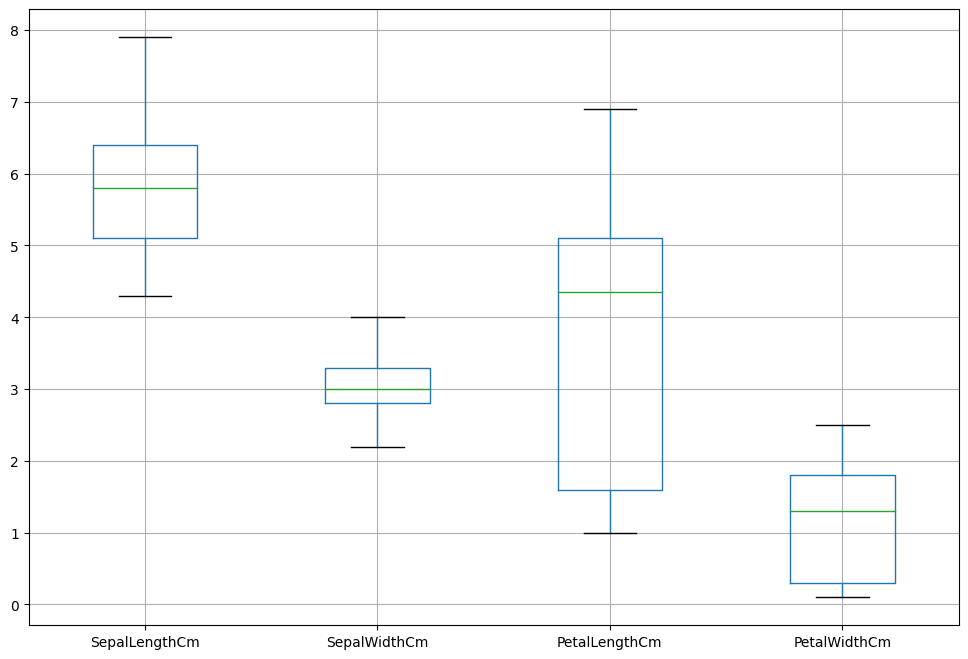

In [53]:
df.boxplot(figsize=(12,8))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Perceptron model

In [ ]:
perceptron = Perceptron(max_iter=40, eta0=0.1, random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=42)

# Predict the labels of the test set

In [ ]:
y_pred = perceptron.predict(X_test)

# Calculate the accuracy of the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


# Display the first few predictions

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.82      1.00      0.90         9
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30



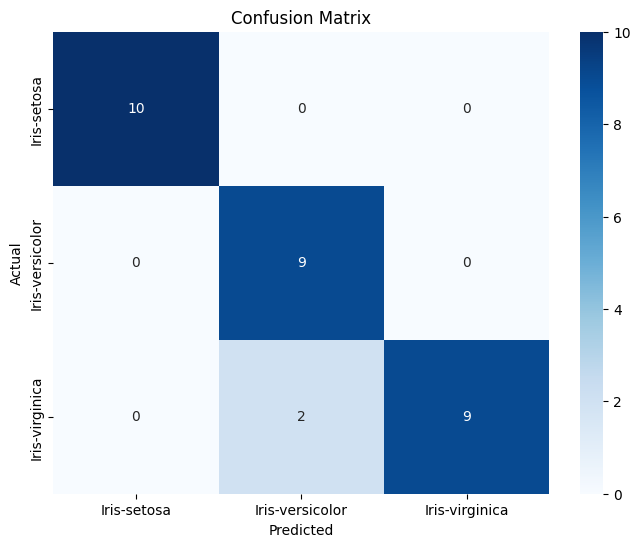

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("First 10 predictions:", y_pred[:10])
print("First 10 actual labels:", y_test[:10])

First 10 predictions: [1 0 2 1 1 0 1 2 1 1]
First 10 actual labels: 73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
Name: Species, dtype: int64


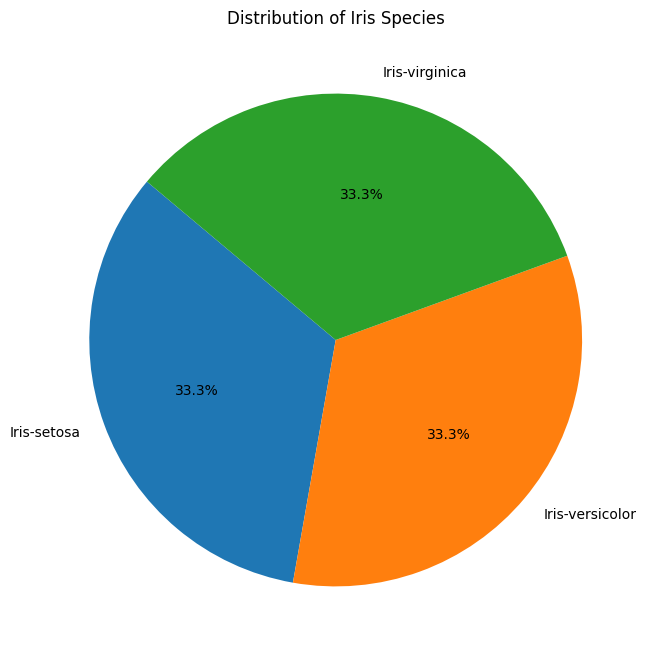

In [ ]:
species_counts = df['Species'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Iris Species')
plt.show()